<a href="https://colab.research.google.com/github/Hemavathi22-HV/Hemavathi22-HV/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, sep=';')

# Display basic info
print("Dataset shape:", wine.shape)
print("\nFirst 5 rows:\n", wine.head())
print("\nData types:\n", wine.dtypes)
print("\nMissing values:\n", wine.isnull().sum())
print("\nDescriptive statistics:\n", wine.describe().T)

Dataset shape: (1599, 12)

First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  


/tmp/ipython-input-1164002441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette='viridis')


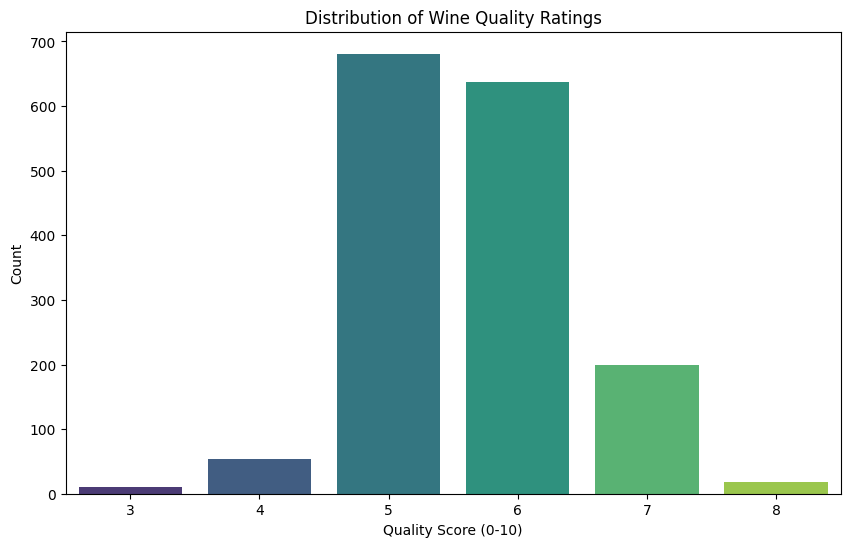

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score (0-10)')
plt.ylabel('Count')
plt.show()

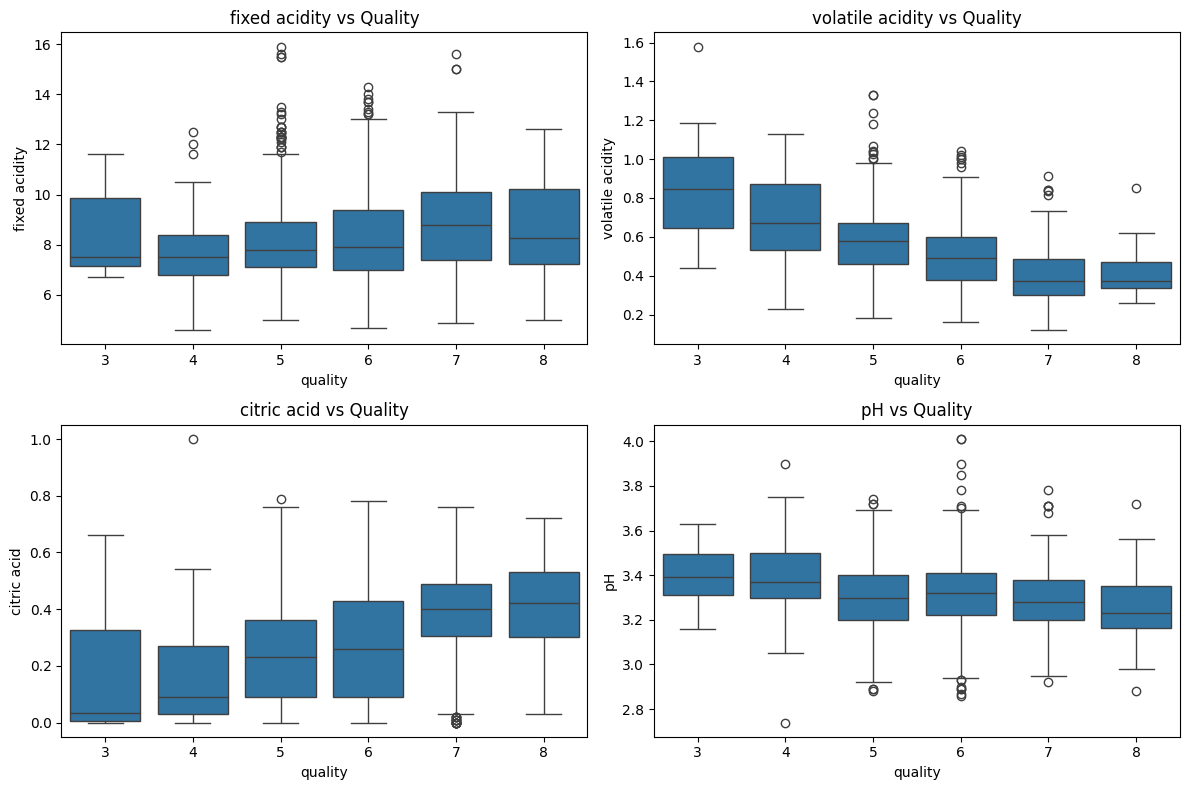

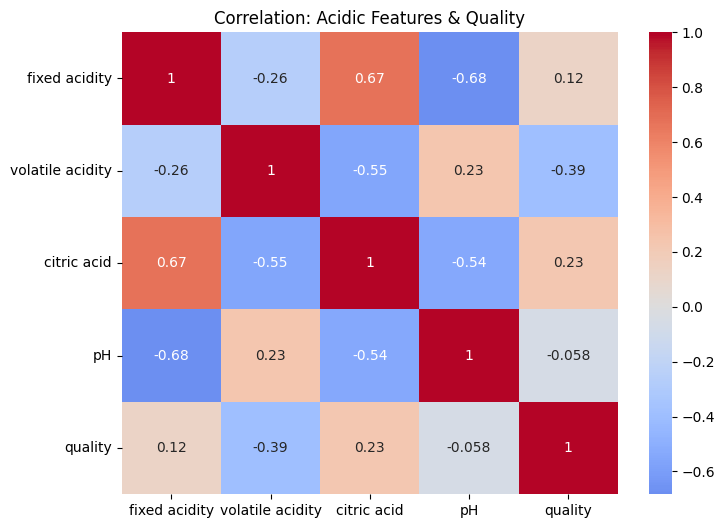

In [4]:
acidic_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH']

# Boxplots of acidic features vs quality
plt.figure(figsize=(12, 8))
for i, feature in enumerate(acidic_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, data=wine)
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

# Correlation of acidic features with quality
acidic_corr = wine[acidic_features + ['quality']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(acidic_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Acidic Features & Quality')
plt.show()

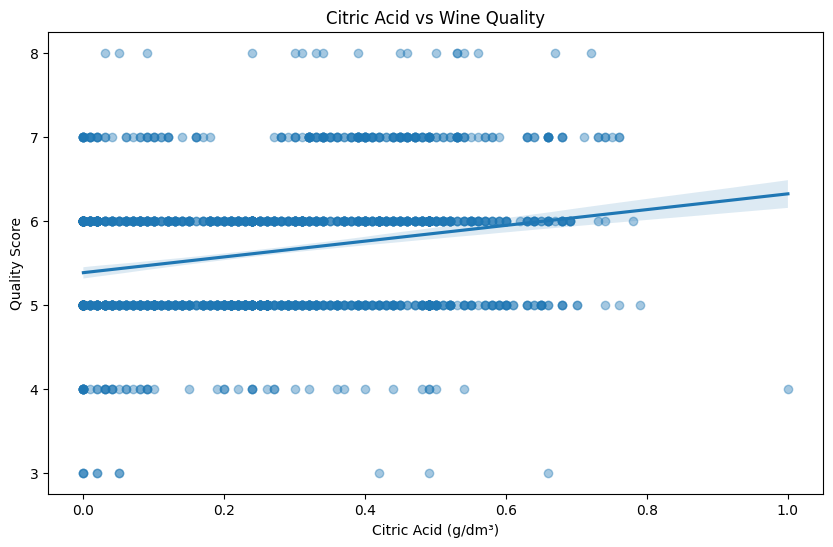

In [5]:
plt.figure(figsize=(10, 6))
sns.regplot(x='citric acid', y='quality', data=wine, scatter_kws={'alpha':0.4})
plt.title('Citric Acid vs Wine Quality')
plt.xlabel('Citric Acid (g/dm³)')
plt.ylabel('Quality Score')
plt.show()

In [6]:
# Define features (X) and target (y)
X = wine.drop('quality', axis=1)
y = wine['quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [8]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Model Evaluation:
Mean Absolute Error (MAE): 0.504
Mean Squared Error (MSE): 0.390
Root Mean Squared Error (RMSE): 0.625
R² Score: 0.403



Feature Importance (Coefficients):
                  Feature  Coefficient
10               alcohol     0.296628
9              sulphates     0.146815
5    free sulfur dioxide     0.058015
0          fixed acidity     0.039789
3         residual sugar     0.009421
7                density    -0.019204
2            citric acid    -0.027512
8                     pH    -0.060610
4              chlorides    -0.089084
6   total sulfur dioxide    -0.120008
1       volatile acidity    -0.179439


/tmp/ipython-input-3408639875.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


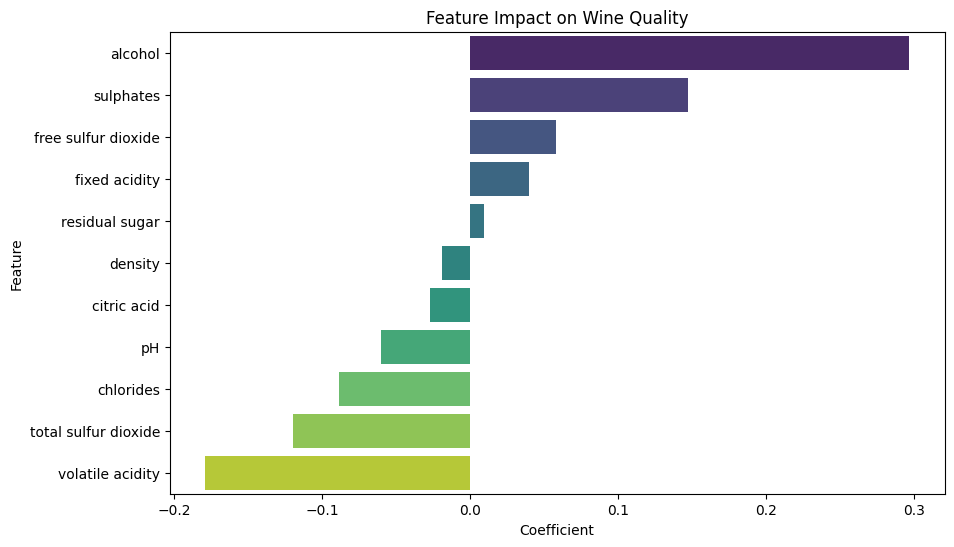

In [9]:
# Get coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):\n", coefficients)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Impact on Wine Quality')
plt.show()

In [10]:
# Example wine sample (from dataset)
sample_wine = np.array([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])

# Scale and predict
sample_scaled = scaler.transform(sample_wine.reshape(1, -1))
predicted_quality = model.predict(sample_scaled)

print(f"\nPredicted Quality for Sample Wine: {predicted_quality[0]:.2f}")


Predicted Quality for Sample Wine: 5.05


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
